# TP Analyse de Fourier et Hilbertienne n° 1

**ENS Cachan**

**Département de Mathématiques**

**2019 / 2020**


---


**NOM et Prenom:**    LIANG Wendong

---


## Consignes pour le rapport de TP

Ce TP comporte 17 questions. Les réponses, les résultats d'expérience (images, figures), ansi que les codes devront être rassemblés dans notebook **individuel**. \
Vous êtes également invité à rajouter toute remarque ou commentaire sur les résultats ou votre code là où vous le jugerez nécessaire. Vous pouvez créer une nouvelle cellule en cliquant sur l'icone **+** and choisir le type de cellule (*Code* ou "*Markdown*" pour du texte). **Pensez à sauvegarder régulièrement votre travail** (icône disquette ou CTRL+S).

Ce rapport est à envoyer via le site suivant : [lien](https://docs.google.com/forms/d/1kidyeKvme_KBmH7JLkp-9rmCauu1m1dq2KgnH2dotxA/viewform?edit_requested=true) au plus tard pour le **vendredi 11 octobre 2019**. \
**Une pénalité de deux points par jour de retard sera appliqué**. \
Le fichier joint doit être un notebook executable au format *ipynb* (dans *Google Colab*, Fichiers -> Télécharger le fichier ipynb), intitulé *nom_prenom_tp1.ipynb*.
Vous recevrez un accusé de soumission. Veuillez vous en assurez.

Enfin nous vous recommandons avant d'envoyer votre TP de cliquer sur Execution -> Tout executer. Vérifier ensuite que l'ensemble du notebook ne comporte pas d'erreurs

## Rapide tutoriel de notebook

Le format du TP est un notebook Python (fichier *ipynb*). C'est une interface de programmation *intéractive* qui vous permettra d'executer des cellules de codes pythons et d'écrire directement vous solutions remarques et commentaires. Ce notebook est composé de plusieurs cellules. Une cellule peut être soit une cellule de code dans laquelle vous rédigez du code python, soit une cellule de texte où vous rédiger comme dans un traitement de texte classique.

Chaque cellule de code python peut s'executer *indépendamment* des autres. Le résultat de chaque cellule (affichage d'une image, résultat d'un ``print``, où même une erreur de compilation) s'afffiche en dessous de chaque cellule exécutée, exactement comme dans le shell python de logiciel comme *PyCharm, Pyzo* ou *Spyder* ou n'importe quel autre de vos environnements Python préférés.

Pour modifier une cellule (de code ou de texte) il suffit de double cliquer dessus. \
Après modification d'une cellule de texte ou pour executer une cellule de code, il faut appuyer sur CTRL+entrée. Pour gagner du temps, vous pouvez aussi appuyer sur SHIFT+Entrée pour executer une cellule et passer à la cellule suivante.

Pour la rédaction de vos réponses, remarques, etc. vous pouvez :
 - taper du texte classique
 - mettre en caractère italique en encadrant votre texte entre deux astérisques ( * blabla * )  *comme ceci*
 - mettre en caractère gras en encadrant votre texte entre deux doubles astériques ( ** blablabla ** ) **comme ceci**
 - écrire en langage mathématiques avec $\LaTeX$ entre mettant l'expression entre deux dollars au sein d'une ligne ou entre deux double dollars pour écrire une équation sur une seule ligne
 
Vous pouvez trouver plus d'information à propos des notebooks sur internet et en particulier sur [lien](https://python.sdv.univ-paris-diderot.fr/18_jupyter/) qui traite de l'installation à l'utilisation d'un notebook *Jupyter*.

Vous pouvez trouver quelques informations sur les principaux boutons que l'on va utiliser pour ces TP sur la figure suivante :

![img](https://mnhrdt.github.io/afh/TP1/figure0.jpeg)

# Mise en route

## Modules python et fichiers necessaires

On commence par charger les images ainsi que les modules python nécessaires pour l'execution du TP.


In [0]:
!wget -qN https://mnhrdt.github.io/afh/TP1/images-tp1.zip
!unzip -o images-tp1.zip

Archive:  images-tp1.zip
  inflating: barbara.png             
  inflating: building.png            
  inflating: butte.png               
  inflating: lena.png                
  inflating: nouvelle_image.png      
  inflating: room.png                
  inflating: sand.png                
  inflating: tile.png                
  inflating: water.png               


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io as imageio

from numpy.fft import fft, ifft, fftshift, ifftshift, fft2, ifft2
from skimage import transform

plt.show()
plt.ion()

%matplotlib inline

# 1. Notions de base sur les images numériques

Nous travaillerons exclusivement avec des images en niveaux de gris.

## 1.1 Niveaux de gris

Une  image  numérique  est  un  tableau  de  pixels  (vu  comme  une  matrice), dont les  coefficients  sont
typiquement des nombres flottants compris entre 0 et 1 ou des entiers entre 0 et 255. Il est très facile de
créer des images simples avec Python. Par exemple, le script suivant crée une image de taille $500 \times 500$ représentant un carré noir sur fond blanc.

In [0]:
#création de l'image u
u = np.ones((500, 500))
u[200:400, 100:300] = 0

Pour visualiser une image ``u`` (ou n’importe quel tableau) nous utiliserons les instructions suivantes (le
problème de la visualisation d’une image est abordé en détail dans la partie suivante) :

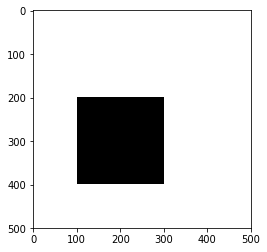

In [0]:
plt.imshow(u, cmap=plt.cm.gray)

### Question 1

**Q1 :** Créez une image de taille $256 \times 256$ qui soit constante sur chaque colonne et dont le niveau de gris varie progressivement de 0 à 1 (progression linéaire)

**Aide python :** Si $a$ et $b$ sont deux nombres, alors ``np.linspace(a, b, n)`` est un vecteur de longueur $n$ avec des valeurs linéairement espacées entre $a$ et $b$.

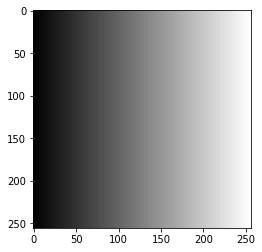

In [0]:
##   METTRE VOTRE CODE ICI  ET EXECUTER LA CELLULE POUR EN AFFICHER L'IMAGE.##
u=np.zeros((256,256))
for i in range(len(u)):
  u[i]=np.linspace(0,1,256)
##   VERIFIER ALORS QU'IL S'AGIT BIEN DU RESULTAT ATTENDU  ##
plt.imshow(u,cmap=plt.cm.gray)

### Question 2

**Q2 :** Que représente l'image suivante ?
    
![img](https://mnhrdt.github.io/afh/TP1/figure2.jpeg)

**Réponse :** il représente l'image de taille 9*9, de fond noir, avec une carré 3*3 blanc au milieu, couronné en gris(0.5).

**Q2 bis :** En vous aidant du code précédent, par quelle suite de commandes peut-on créer et afficher cette image ? Faites-le.

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.5 0.5 0.5 0.  0. ]
 [0.  0.  0.5 1.  1.  1.  0.5 0.  0. ]
 [0.  0.  0.5 1.  1.  1.  0.5 0.  0. ]
 [0.  0.  0.5 1.  1.  1.  0.5 0.  0. ]
 [0.  0.  0.5 0.5 0.5 0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


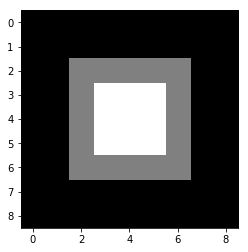

In [0]:
                  ###   CREER ET VISUALISER L'IMAGE CI-DESSUS   ###
  u=np.zeros((9,9))
  for i in range(2,7):
    for j in range(2,7):
      u[i][j]=0.5
  for i in range(3,6):
    for j in range(3,6):
      u[i][j]=1
  print(u)
  plt.imshow(u,cmap=plt.cm.gray)

 ## 1.2 Visualisation des images

### 1.2.1 Plage de valeurs

La manipulation mathématique des images amène à considérer des images dont les niveaux de gris sont des nombres réels (ou du moins la représentation informatique des nombres réels, c’est-à-dire des nombres flottants). En effet, toutes les images ne peuvent pas être limitées à des valeurs entre 0 et 1.

La méthode de visualisation habituelle effectue une transformation affine des valeurs qui ramène l’intervalle
$[\min(u), \max(u)]$  sur l’intervalle intensité d’image : $\min(u)$ correspond au noir (typiquement
représenté par 0) et $\max(u)$ au blanc (typiquement représenté par 1 ou par 255).

### 1.2.2 Lecture et écriture des fichiers d'images

La fonction `plt.imread` permet de lire des fichiers images en format PNG : 

In [0]:
u = imageio.imread("tile.png")

Ainsi obtenu, ``u`` est un Array numpy de nombres entier compris entre 0 et 255. On peut le vérifier par les
commandes suivantes :

In [0]:
print("Shape de u :")
print(u.shape)

print("Min et max de u :")
print(np.min(u), np.max(u))

print("Type de u :")
print(u.dtype)

Shape de u :
(512, 512)
Min et max de u :
0 255
Type de u :
uint8


Pour enregistrer une image ``u`` dans un fichier d’image PNG on peut utiliser la fonction ``imageio.imsave`` :

In [0]:
imageio.imsave("nouvelle_image.png", u)  # le format est imageio.imsave("nom_fichier.extension", nom de l'array)

**ATTENTION :** ``imageio.imsave`` écrase les fichiers existants sans prévenir !

**Pour info :** Il est conseillé de laisser les images en *uint8* entre 0 et 255 avant de les sauvegarder avec `imageio`. Mais d'autres modules travaillent avec des Array de flottants entre 0 et 1.

Pour convertir une image d'entier *uint8* entre 0 et 255 en flottants *float64* entre 0 et 1, vous pouvez par exemple faire :

In [0]:
u = (u/255.).astype(np.float64)

Vérifions maintenant que ``u`` a des valeurs entre 0 et 1 d'une part et que toutes ses valeurs sont des flottants de type *float64* d'autre part :

In [0]:
print("Min et max de u :")
print(np.min(u), np.max(u))

print("Type de u :")
print(u.dtype)

Min et max de u :
0.0 1.0
Type de u :
float64


### 1.2.3 Visualisation des images avec Python

**imshow :**  La fonction qu’on utilisera pour visualiser des images avec Python est ``plt.imshow(im, cmap=plt.cm.gray")``. Le paramètre
`im` est le nom d’une variable contenant un tableau à valeurs réelles ou entières. Optionnellement, on peut indiquer la plage de valeurs à montrer avec la commnande ``plt.imshow(im, cmap=plt.cm.gray, vmin=-10, vmax=10)``.

Dans l’exemple, la plage de valeurs va de -10 à 10 ; la valeur -10 correspondra au noir, la valeur 10
au blanc et les valeurs intermédiaires à differents niveaux de gris, toutes les valeurs plus petites que
-10 ou plus grandes que 10 seront saturées et donc montrées comme noires ou blanches respectivement. Si les paramètres **vmin** et **vmax** ne sont pas spécifiés, la gamme sera automatiquement fixée à **vmin=im.min()** et **vmax=im.max()**.

### Question 3

**Q3 :** Chargez l’image *water.png* dans la variable `im`

In [0]:
 ##  CHARGER L'IMAGE DANS CETTE CELLULE   ##
im=imageio.imread('water.png')

Testez les commandes suivantes :

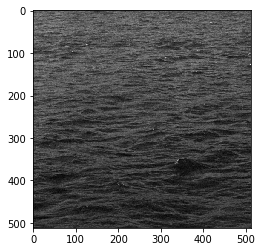

In [0]:
plt.imshow(im, cmap=plt.cm.gray)

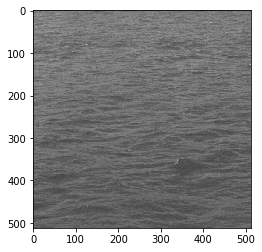

In [0]:
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=255)

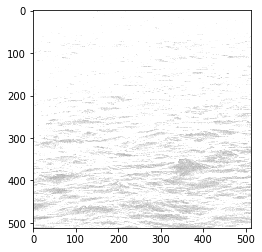

In [0]:
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=100)

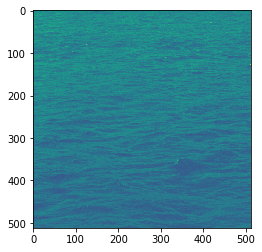

In [0]:
plt.imshow(im, vmin=0, vmax=255)

**Q3 bis :** Comment expliquez-vous les différences observées entre les visualisations ?

 **Réponse :** Les trois première images ont pour paramètre cmap=plt.cm.gray, donc la couleur est gris. Par contre la dernière n'ont pas précisé cmap donc la couleur est inchangé.

La première a plus grand degré de contrast parce qu'il prend noir le pixel qui a le im.min(), et blanc celui qui a im.max() La trosième est plus clair car tous les pixels qui ont le degré plus grand que 100 sont blanc.


**Remarque :** Pour fixer la palette grise par défaut, exécuter la cellule suivante :

In [0]:
plt.rcParams["image.cmap"]="gray"

# 2. Transformée de Fourier discrète (TFD)

## 2.1 En dimension 1

### Question 4

**Q4 :** Trouvez et lisez l'aide de numpy.fft (par exemple [ici](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html)). La définition de la TFD dans Python diffère de celle du cours. Précisez.

**Réponse :** 
Dans le cours, DFT a un mulitiplicateur de 1/N, et IDFT non. Ce qui est au contraire de la définition ici.

En réalité, ce ne sont que des différrences de conventions. Les propriétés de la TFD restent inchangées. Par soucis de simplicité, nous utiliserons pour ces TPs la définition de Python.

Créez un signal discret `u` de longueur paire $N=512$ représentant un créneau :

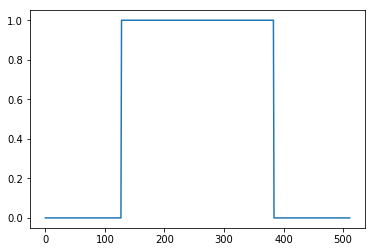

In [0]:
N = 512

u = np.zeros(N)
u[N//4:3*N//4] = 1

plt.plot(u)

**Q5 :** Calculez  le  module  de  Fourier `modu` du  signal `u` et visualisez-le.

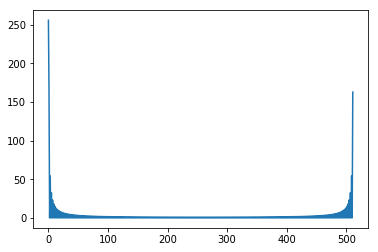

In [0]:
#Calcul du module
modu = np.abs(fft(u))

#Affichage
plt.plot(modu)

**Q5 bis :** Le graphique obtenu est-il conforme à vos attentes ? Où se trouve la fréquence nulle ?

**Réponse :** Le graphique est mal centré. La fréquence nulle est à l'extrêmité gauche.

**Q5 ter :** Utilisez la commande ``fftshift`` pour placer la fréquence nulle au centre du graphique.

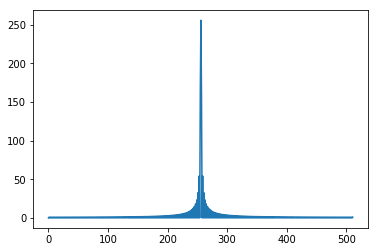

In [0]:
## MODIFIER LE CODE ICI EN UTILISANT LA COMMANDE FFTSHIFT POUR PLACER LA FREQUENCE NULLE AU CENTRE DU GRAPHIQUE ##
N = 512

u = np.zeros(N)

u[N//4:3*N//4] = 1

modu = np.abs(fft(u))


plt.plot(fftshift(modu))

**Eventuel commentaire ou remarque :** *Ecrivez ici*.


## 2.2 En dimension 2

### 2.2.1 TFD et TFD inverse

La TFD en dimension 2 est donnée par la fonction `np.fft.fft2`, la transformation inverse est donnée par ```np.fft.ifft2```. Lisez la section “Higher dimensions” de l’[aide en ligne de **numpy.fft**](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html). Remarquez que la
propriété de séparabilité de la transformation est mise en œuve.

**Remarque :** En pratique il est possible que la TFD inverse de la TFD d’une image réelle ne soit pas réelle. À cause des erreurs d’arrondi, la partie imaginaire peut ne pas être strictement nulle. Dans ce cas, on pourra extraire la partie réelle avec la fonction `np.real` (et éventuellement vérifier que la partie imaginaire était *effectivement* négligeable).

### 2.2.2 Visualisation du module

Pour visualiser le module de la TFD d’une image, on utilise souvent une transformation du type $\log(1+ \hat{u})$,
suivie de `fftshift`.

![img](https://mnhrdt.github.io/afh/TP1/figure1.jpeg)

### Question 6

**Q6 :** Écrivez une fonction `view_dft` qui affiche automatiquement le module de la TFD d’une image, et qui donnne des résultats similaires ci-dessus. 

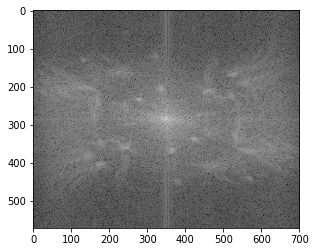

In [0]:
 ##   ECRIRE LA FONCTION VIEW_DFT ICI   ##

def view_dft(fichier):
    im=imageio.imread(fichier)
    modu=np.abs(fftshift(fft2(im)))

    im2=np.log((modu)+1)
    plt.imshow(np.real(im2))
view_dft('barbara.png')
    

**Q6 bis :** Expliquez l’importance du seuillage. Quelle propriété de symétrie du module peut-on observer ?

**Réponse :** La module est symétrique par rapport à frequence 350 sur les deux axes.

On ne visualisera pas la phase d’une image car son interprétation est assez difficile. Néanmoins, comme le montrent les expériences qui suivent, la phase d’une image est au moins aussi importante que son module du point de vue de l’information qu’elle contient.

### 2.2.3 Echange du module et de la phase de deux images

### Question 7

**Q7 :** Calculez  et  visualisez  les  deux  images  obtenues  en  échangeant  le  module  et  la  phase  des  images *building.png* et *tile.png*. 

**Aide Python :** Le module et la phase d’un nombre complexe $z$ sont donnés respectivement par `np.abs(z)` et `np.angle(z)`

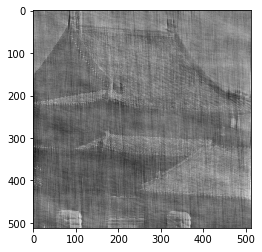

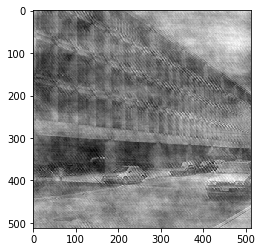

In [0]:
   ##   CHARGER LES IMAGES DEMANDÉES  ##
  im3=imageio.imread('building.png')
  im4=imageio.imread('tile.png')
    
   ##   CALCULER LEUR MODULE ET PHASE RESPECTIVES   ##
  modu3=np.abs(fft2(im3))
  modu4=np.abs(fft2(im4))
  angle3=np.angle(fft2(im3))
  angle4=np.angle(fft2(im4))
  
   ##   CRÉER DEUX AUTRES IMAGES AVEC LA PHASE DE L'UNE ET LE MODULE DE L'AUTRE ET VICE-VERSA   ###
  im5=ifft2(modu3*np.exp(1j*angle4))
  im6=ifft2(modu4*np.exp(1j*angle3))
   ##   AFFICHER CES DEUX DERNIÈRES IMAGES   ##
  plt.imshow(np.real(im5))
  plt.figure()
  plt.imshow(np.real(im6))

**Q7 bis :** Recommencez cette expérience avec les couples d’images (*sand.png*, *water.png*) et (*tile.png*, *sand.png*).

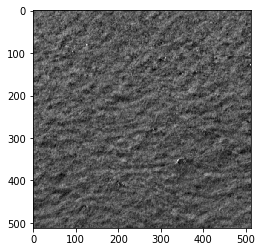

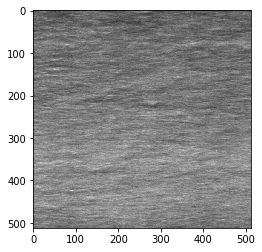

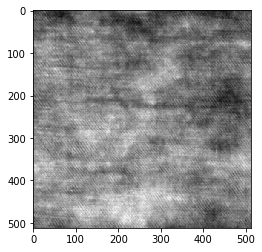

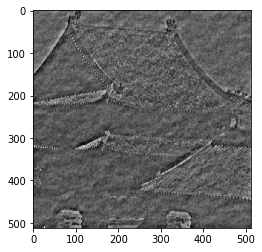

In [0]:
 ## RECOMMENCER ICI AVEC LES AUTRES COUPLES D'IMAGES  ##
     ##   CHARGER LES IMAGES DEMANDÉES  ##
  im3=imageio.imread('sand.png')
  im4=imageio.imread('water.png')
    
   ##   CALCULER LEUR MODULE ET PHASE RESPECTIVES   ##
  modu3=np.abs(fft2(im3))
  modu4=np.abs(fft2(im4))
  angle3=np.angle(fft2(im3))
  angle4=np.angle(fft2(im4))
  
   ##   CRÉER DEUX AUTRES IMAGES AVEC LA PHASE DE L'UNE ET LE MODULE DE L'AUTRE ET VICE-VERSA   ###
  im5=ifft2(modu3*np.exp(1j*angle4))
  im6=ifft2(modu4*np.exp(1j*angle3))
   ##   AFFICHER CES DEUX DERNIÈRES IMAGES   ##
  plt.figure()
  plt.imshow(np.real(im5))
  plt.figure()
  plt.imshow(np.real(im6))
  
  
   ## RECOMMENCER ICI AVEC LES AUTRES COUPLES D'IMAGES  ##
     ##   CHARGER LES IMAGES DEMANDÉES  ##
  im3=imageio.imread('tile.png')
  im4=imageio.imread('sand.png')
    
   ##   CALCULER LEUR MODULE ET PHASE RESPECTIVES   ##
  modu3=np.abs(fft2(im3))
  modu4=np.abs(fft2(im4))
  angle3=np.angle(fft2(im3))
  angle4=np.angle(fft2(im4))
  
   ##   CRÉER DEUX AUTRES IMAGES AVEC LA PHASE DE L'UNE ET LE MODULE DE L'AUTRE ET VICE-VERSA   ###
  im5=ifft2(modu3*np.exp(1j*angle4))
  im6=ifft2(modu4*np.exp(1j*angle3))
   ##   AFFICHER CES DEUX DERNIÈRES IMAGES   ##
  plt.figure()
  plt.imshow(np.real(im5))
  plt.figure()
  plt.imshow(np.real(im6))

**Q7 ter :** Quelles conclusions générales peut-on en tirer sur les contenus visuels du module et de la phase d’une image ? (On distingue deux types de “contenu visuel” : les contours géométriques et les textures).

**Réponse :** 
Les contours géométrique correspond à la phase, et les textures correspondent aux textures.

# 3. Effet de *Gibbs* et zooms avant

## 3.1 Polynôme trigonométrique associé à un signal discret

Soit $u_k, k = 0, \dots, N-1$ un signal discret et $\tilde{u}_n, n = -\dfrac{N}{2}, \dots, \dfrac{N}{2}$ sa TFD. On suppose que $N$ est un entier pair. On rappelle que le polynôme trigonométrique associé à $u$ est le polynôme $P_u$ défini par

$$P_u(x) = \sum_{n = -\frac{N}{2}}^{\frac{N}{2}-1} \tilde{u}_n ~ e^{\frac{2i\pi nx}{N}}.$$

Le polynôme $P_u$ vérifie $P_u(k) = u_k$ pour tout $k = 0, \dots, N-1$. Alors $P_u$ est un polynôme trigonométrique qui interpole les valeurs du signal $u$. En revanche, $P_u$ n’est pas nécessairement à valeur réelle, ce qui n’est pas satisfaisant en pratique.

### Question 8

**Q8 :** Dans ce contexte ($u$ réel et $N$ pair) montrez que $P_u$ est à valeur réelle si et seulement si $\tilde{u}_{-\frac{N}{2}} = 0$. Notez également que pour tout signal $u$, la partie réelle de $P_u$ est un polynôme trigonométrique qui interpole les valeurs de $u$.

**Réponse :** *Écrivez votre réponse ici.*

Soit $n = -\dfrac{N}{2}+1, \dots, \dfrac{N}{2}-1$
alors $\tilde{u}_{-n}=\overline{\tilde{u}_{n}}$,  et $\tilde{u_0}$ est réelle.

alors $$P_u(x) = \sum_{n = 1}^{\frac{N}{2}-1} \tilde{u}_n ~ e^{-\frac{2i\pi nx}{N}}+\sum_{n = -\frac{N}{2}+1}^{-1} \tilde{u}_n ~ e^{-\frac{2i\pi nx}{N}}+\tilde{u_{0}}+\tilde{u}_{-\frac{N}{2}}e^{-i{\pi}x}.$$
$$=\sum_{n = 1}^{\frac{N}{2}-1} \tilde{u}_n ~ e^{-\frac{2i\pi nx}{N}}+\sum_{k = 1}^{\frac{N}{2}-1} \tilde{u}_{-k} ~ e^{\frac{2i\pi kx}{N}}+\tilde{u_{0}}+\tilde{u}_{-\frac{N}{2}}e^{-i{\pi}x}.$$
$$=\sum_{n = 1}^{\frac{N}{2}-1} \tilde{u}_n ~ e^{-\frac{2i\pi nx}{N}}+\sum_{n = 1}^{\frac{N}{2}-1} \overline{\tilde{u}_{n} ~ e^{-\frac{2i\pi nx}{N}}}+\tilde{u_{0}}+\tilde{u}_{-\frac{N}{2}}e^{-i{\pi}x}.$$

ce qui est à valeur réelle si et seulement si   $   \tilde{u}_{-\frac{N}{2}}=0$

En pratique, on utilise la partie réelle de $P_u$ pour interpoler le signal $u$. Il en est de même en dimension 2.

## 3.2 Effet de *Gibbs* sur les images

### Question 9

L'effet de *Gibbs* est le phénomène suivant : les projections basses fréquences d’un signal présentant des discontinuités ont des comportements oscillants autour des discontinuités. Nous allons mettre en évidence ce phénomène à partir d’une image discrète (voir le polycopié du cours pour le cas des signaux unidimensionnels). 

**Q9 :** Créez une image `rectangle` de taille $512 \times 512$ représentant un rectangle gris clair (niveau de gris
$0.8$)  sur  un  fond  gris  foncé  (niveau  de  gris  $0.2$),  voir  la  section  1.1.  

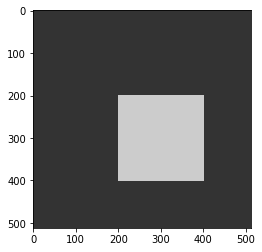

In [0]:
  ## CREER L'IMAGE DEMANDÉE DANS CETTE CELLULE  ##
  im=np.ones((512,512))*0.2

  for i in range(200,401):
    for j in range(200,401):
      im[i][j]=0.8
  plt.imshow(im, vmin=0,vmax=1)


**Q9 bis :** Calculez  la  TFD  de  l’image rectangle. Annulez toutes les fréquences qui ne sont pas dans le carré central de taille $n \times n$ avec $n = 64$ et calculez l’image `rectbf` correspondant à ce spectre ne comportant que des basses fréquences.

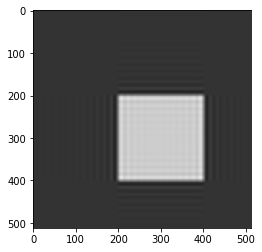

In [0]:
 ## CALCULER LA TFD DE L'IMAGE PRÉCEDEMMENT CRÉÉE  ##
    spec=fftshift(fft2(im))

 ## ANNULER TOUTES LES FREQUENCES DEMANDÉES  ##
m,n=im.shape
spec[:,:m//2-32]=0
spec[:,m//2+32:]=0
spec[:m//2-32,:]=0
spec[m//2+32:,:]=0

 ## CALCULER L'IMAGE RECTBF  ##
    recbf=ifft2(ifftshift(spec))
    plt.figure()
    plt.imshow(np.real(recbf), vmin=0,vmax=1)

**Q9 ter :** Commentez les résultats observés.

**Réponse :** *Écrivez votre réponse ici.*
Comme on enlève les basses fréquence, il y a des oscillation à la frontière de discontinuité. Ceci s'explique par l'effet de Gibbs. En effet, les basses fréquences servent à réduire l'erreur d'arrondi de la frontière comme en une dimension.

## 3.3 Zooms avant

### Question 10

Le code suivant vous permet de comparer trois méthodes d’interpolation
pour zoomer une image. 

 - La première est la méthode “pixel le plus proche”.
 - La deuxième repose sur l’interpolation bilinéaire.
 -  La troisième est le zoom par zéro-padding (extension du spectre avec des hautes fréquences nulles)

In [0]:
## MODIFIER ICI POUR CHARGER UNE AUTRE IMAGE OU CHANGER LE FACTEUR DE ZOOM r

u2 = plt.imread('lena.png') #Chargement de l'image
r = 4                       # Facteur de zoom

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


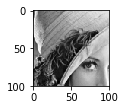

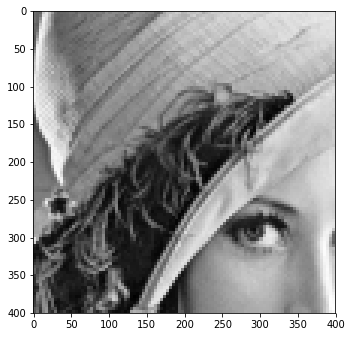

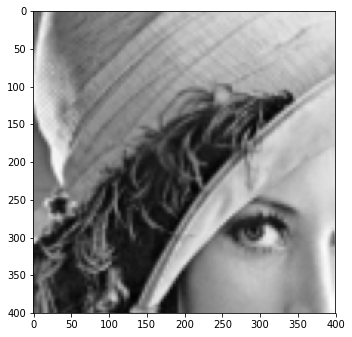

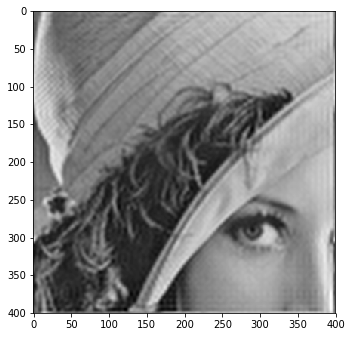

In [0]:
    
                  ##               NE RIEN MODIFIER DANS CETTE CELLULE         ##
    
    
u = u2[60:160,60:160]
(m, n) = u.shape

plt.figure(figsize=[s/72.0 for s in u.shape])
plt.imshow(u, cmap=plt.cm.gray, interpolation='nearest')

# Zoom pixel le plus proche :
v0 = transform.rescale(u,r,0)
plt.figure(figsize=[s/72.0 for s in v0.shape])
plt.imshow(v0, cmap=plt.cm.gray)

# Zoom par interpolation bilineaire :
v1 = transform.rescale(u,r,1)
plt.figure(figsize=[s/72.0 for s in v1.shape])
plt.imshow(v1, cmap=plt.cm.gray)

# Zoom par 0-padding :
U = np.fft.fftshift(fft2(u))
V = np.zeros([r*s for s in u.shape],np.complex64)
V[ (r*m//2-m//2):(r*m//2+m//2) , (r*n//2-n//2):(r*n//2+n//2)] = U
v = np.real(np.fft.ifft2(np.fft.fftshift(V)))

plt.figure(figsize=[s/72.0 for s in v.shape])
plt.imshow(v, cmap=plt.cm.gray)

**Q10 :** Testez les zooms sur plusieurs images.

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


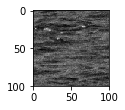

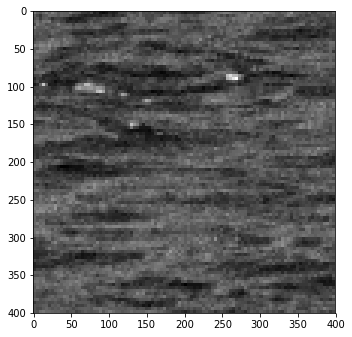

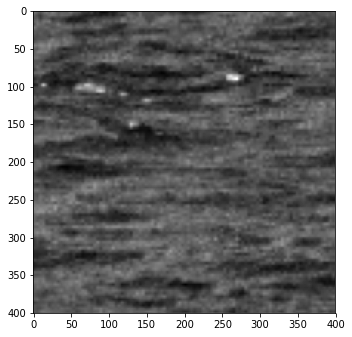

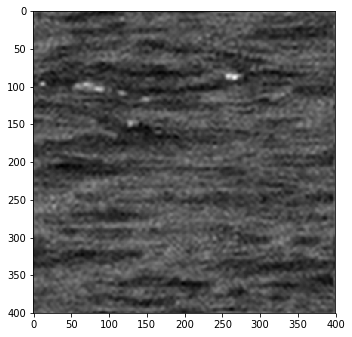

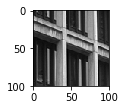

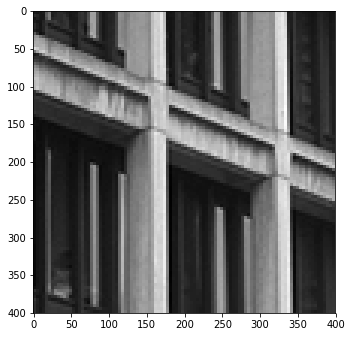

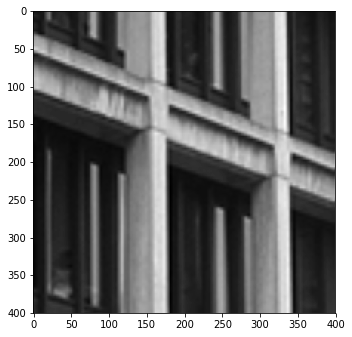

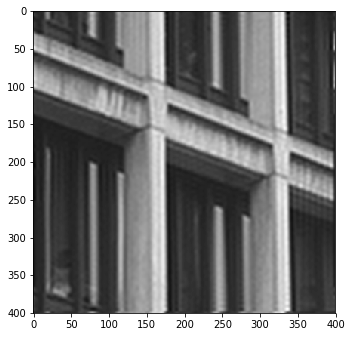

In [0]:
 ## TESTER LES DIFFERENTES FONCTIONS DE ZOOM CI-DESSUS SUR PLUSIEURS IMAGES ##
def test(fichier):
  u2 = plt.imread(fichier) #Chargement de l'image
  r = 4                       # Facteur de zoom 
  u = u2[60:160,60:160]
  (m, n) = u.shape
  plt.figure(figsize=[s/72.0 for s in u.shape])
  plt.imshow(u, cmap=plt.cm.gray, interpolation='nearest')
# Zoom pixel le plus proche :
  v0 = transform.rescale(u,r,0)
  plt.figure(figsize=[s/72.0 for s in v0.shape])
  plt.imshow(v0, cmap=plt.cm.gray)

# Zoom par interpolation bilineaire :
  v1 = transform.rescale(u,r,1)
  plt.figure(figsize=[s/72.0 for s in v1.shape])
  plt.imshow(v1, cmap=plt.cm.gray)

# Zoom par 0-padding :
  U = np.fft.fftshift(fft2(u))
  V = np.zeros([r*s for s in u.shape],np.complex64)
  V[ (r*m//2-m//2):(r*m//2+m//2) , (r*n//2-n//2):(r*n//2+n//2)] = U
  v = np.real(np.fft.ifft2(np.fft.fftshift(V)))
  
  plt.figure(figsize=[s/72.0 for s in v.shape])
  plt.imshow(v, cmap=plt.cm.gray)
 
test('water.png')
test('building.png')

**Q10 bis :** Décrivez brièvement les défauts de chacune des méthodes. Expliquez le lien entre les défauts du zoom par zéro-padding et l’effet de *Gibbs*.

**Réponse :** *Écrivez votre réponse ici.*
La méthode “pixel le plus proche”: les pixels sont justes amplifié, et l'image n'est pas lisse.
L’interpolation bilinéaire: l'image est plus lisse mais risque d'être floue.
Le zoom par zéro-padding: il y a des oscillations sur la frontière intérieure de l'image. L'oscillation due à l'effet de Gibbs est invisible dans l'image originale parce qu'il y a échantillonnage idéal. Par contre quand les nombres d'échantillons ne sont pas suffisant, l'effet de Gibbs apparaît.

# 4. Translation non entière et rotation

## 4.1 Translation non entière

### Question 11

Soit $u_{k,l}$ une image carrée de taille $N \times N$ et $(\tilde{u}_{m,n})$ sa TFD. On pose 

$$ P_u(x, y) = \sum_{m=-\frac{N}{2}}^{\frac{N}{2}-1} ~ \sum_{n=-\frac{N}{2}}^{\frac{N}{2}-1} \tilde{u}_{m,n} ~ e^{\frac{2 i \pi m x}{N}} ~  e^{\frac{2 i \pi n y}{N}} $$
le polynôme trigonométrique représenté par $u$.

**Q11 :** Soit $a$ et $b$ deux réels. Exprimez la TFD de $(k, l) \to P_u(k-a, l-b)$ en fonction des $\tilde{u}_{m, n}$.

**Réponse :** $(m, n) \to e^{-\frac{2 i \pi m a}{N}}e^{-\frac{2 i \pi n b}{N}}\tilde{u}_{m, n} $

**Q11 bis :** Codez une fonction `translation_fourier(u, a, b)` qui calculera la translation de l'image $u$ par le vecteur $(a, b)$. Cette fonction retournera la partie réelle de la translation de $P_u$, en accord avec les remarques de la section 3.1.

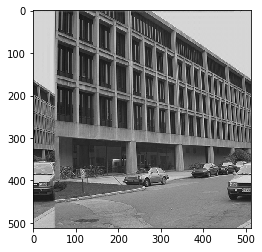

In [0]:
   ## ECRIRE LA FONCTION v=transformation_fourier(u,a,b) ICI  ##
  def transformation_fourier(u,a,b):
    F=fftshift(fft2(u))

    for m in range(len(F)):
      for n in range(len(F[0])):
        F[m][n]=F[m][n]*np.exp(-2j*np.pi*m*a/len(F))*np.exp(-2j*np.pi*n*b/len(F))
    v=np.real(ifft2(ifftshift(F)))
    return v
  u=imageio.imread('building.png')
  v=transformation_fourier(u,3.3,50.7)
  plt.imshow(v)


**Q11 ter :** Testez votre fonction en faisant une translation sous-pixelienne de $(3.3, 50.7)$ pixels d'une image.

## 4.2 Rotation d'une image (devoir à la maison)

La rotation d’une image par la méthode de *Yaroslavsky* se base sur la décomposition suivante :

$$R_{-\theta} = \begin{pmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{pmatrix}$$

$$ \begin{pmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{pmatrix} = 
\underbrace{\begin{pmatrix}
1 & \tan(\frac{\theta}{2}) \\
0 & 1
\end{pmatrix}}_{:=T(\theta)}
\underbrace{\begin{pmatrix}
1 & 0 \\
-\sin(\theta) & 1
\end{pmatrix}}_{:=S(\theta)}
\begin{pmatrix}
1 & \tan(\frac{\theta}{2}) \\
0 & 1
\end{pmatrix} $$

$$ R_{-\theta} := T_\theta S_\theta T_\theta $$

Remarquez que le changement de variable donné par $T(\theta)$ revient à translater chaque colonne : $u(k, l)$ devient $u(k + \tan(\frac{\theta}{2}) l, l)$. De même, le changement de variable donné par $S(\theta)$ revient à translater chaque ligne : $u(k,l)$ devient $u(k, l - \sin(\theta) k)$.

Les consignes qui suivent ont pour but de vous aider à coder l'algorithme de rotation de *Yaroslavsky*.

### Question 12

**Q12 :** Codez une fonction `translation_colonnes` qui prend en entrée une image `u` et un vecteur `t`, et qui un translate chaque colonne $k$ de `u` d'une valeur `t[k]` en utilisant la TFD unidimensionnelle.

**Aide Python :** Si **A** est une matrice, alors `np.fft.fft(A, axis=0)` renvoie la matrice des TFD des colonnes de A.

In [0]:
   ###  ECRIRE ICI LA FONCTION translation_colonnes  ###
   def translation_colonnes(u,t):
     m,n=u.shape
     B=fftshift(np.fft.fft(u,axis=0))

     for k in range(m):
       for l in range(n):
         B[k,l]=B[k,l]*np.exp(-2j*np.pi*t[l]*(k-n//2)/n)

     C=np.fft.ifft(ifftshift(B),axis=0)
     return C



**Q12 bis :** Testez cette fonction avec des vecteurs de translation non entiers.

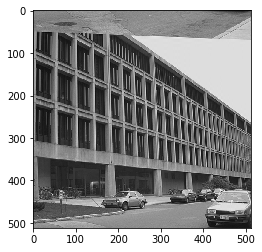

In [0]:
    ###  TESTER VOTRE FONCTION ICI   ###
u=imageio.imread('building.png')
n,m=u.shape
t=np.roll(np.linspace(50.3,70.3,m),m//2)
C=translation_colonnes(u,t)
plt.figure()
plt.imshow(np.real(C))

### Question 13

**Q13 :** Codez une fonction `translation_lignes` qui prend une image `u` et un vecteur `t`, et qui un translate chaque ligne $k$ de `u` d'une valeur `t[k]`. On va utiliser la fonction `translation_colonnes` précédente et les transposition de matrice.

**Aide Python :** Si `A` est une matrice, alors la transposée de `A` est `np.transpose(A)`.

In [0]:
     ###  ECRIRE ICI LA FONCTION translation_lignes ###rrrtrrrr
 def translation_lignes(u,t):
   return np.transpose(translation_colonnes(np.transpose(u),t))

**Q13 bis :** Testez cette fonction avec des vecteurs de translation non entiers.

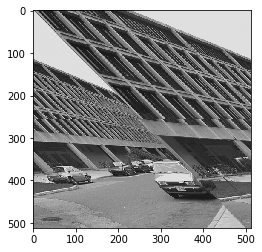

In [0]:
    ###  TESTER VOTRE FONCTION ICI   ###
u=imageio.imread('building.png')
n,m=u.shape

t2=np.roll(np.linspace(1,n*3,n*3)*np.sin(36)*(-1),m//2)

C=translation_lignes(u,t2)
plt.figure()
plt.imshow(np.real(C))

### Question 14

**Q14 :** Coder une fonction `rotation_fourier` en effectuant trois appels successifs aux fonction `translation_colonnes` et `translation_lignes`. Commencez par copier l'image `u` au centre d'une image nulle deux fois plus grande pour éviter les problèmes de bords. Imposez à chacune des translations de ne pas déplacer la colonne (ou la ligne) du centre de l'image. Illustrez la méthode en visualisant chacune des images intermédiaires.

In [0]:
   ###  ECRIRE ICI LA FONCTION rotation_fourier  ###
  def rotation_fourier(u,theta):
    m,n=u.shape
    #t1=np.roll(np.linspace(1,m*3,m*3)*np.tan(theta/2),m*3//2)
    #t2=np.roll(np.linspace(1,n*3,n*3)*np.sin(theta)*(-1),n*3//2)
    t1=(np.linspace(1,m*3,m*3)-m*3//2)*np.tan(theta/2)
    t2=(np.linspace(1,n*3,n*3)-n*3//2)*np.sin(theta)*(-1)
    im=np.zeros((m*3,n*3))
    im[m:m*2,n:n*2]=u
    plt.figure()
    plt.imshow(np.real(im))
    A1=translation_colonnes(im,fftshift(t1))
    plt.figure()
    plt.imshow(np.real(A1))
    A2=translation_lignes(A1,fftshift(t2))
    plt.figure()
    plt.imshow(np.real(A2))
    A3=translation_colonnes(A2,fftshift(t1))
    plt.figure()
    plt.imshow(np.real(A3))


**Q14 bis :** Testez votre fonction en faisant une rotation de 13° d'une image

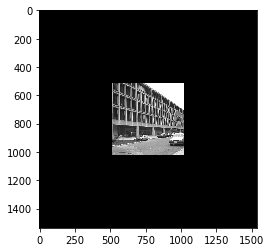

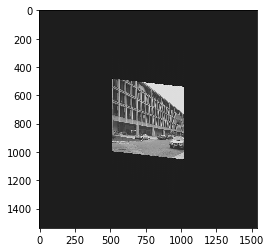

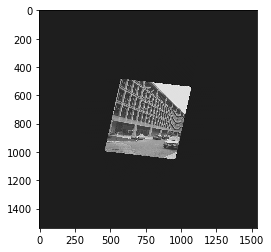

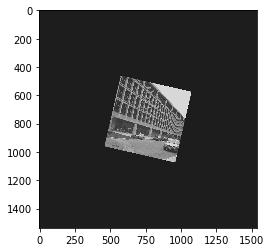

In [0]:
   ### TESTER VOTRE FONCTION ICI  ###
    
u=imageio.imread('building.png')
theta=13*np.pi/180
rotation_fourier(u,theta)

**Q14 ter :** Testez votre fonction en faisant dix rotations de 36° d'une image

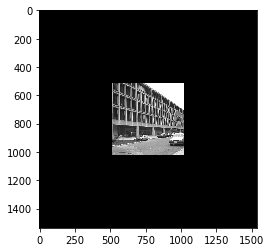

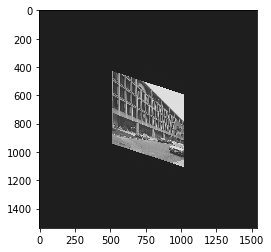

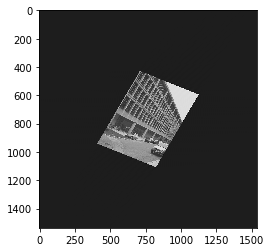

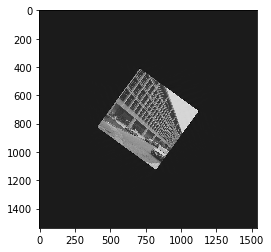

In [0]:
   ### TESTER VOTRE FONCTION ICI  ###
  theta=36*np.pi/180
  rotation_fourier(u,theta)

**Q14 quater :** Testez votre fonction en faisant 360 rotations de 1° d'une image

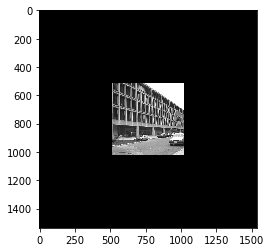

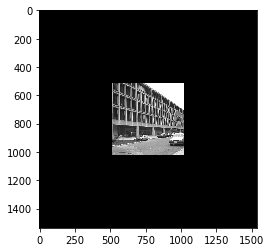

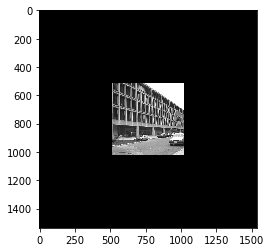

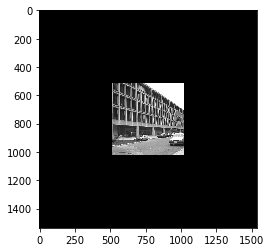

In [0]:
   ### TESTER VOTRE FONCTION ICI  ###
  theta=360*np.pi/180
  rotation_fourier(u,theta)

**Remarques/Commentaires :**  Pourquoi le fond de mes figures rotationnées sont un peu moins noir?
Cet exo m'a mangé beaucoup de temps...

# 5. Zoom arrière et aliasing (devoir à la maison)

Cette section illustre le phénomène d'*aliasing* (ou repliement de spectre).

### Question 15

**Q15 :** Chargez l'image *room.png* dans un tableau `u`. Affichez la.

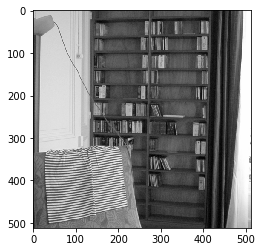

In [0]:
        ###   CHARGER ICI L'IMAGE room.png   ###
    u=imageio.imread('room.png')
        ###   AFFICHER LA ICI   ###
    plt.imshow(u)

**Q15 bis :** Visualisez le module de sa TFD en utilisant votre fonction `view_dft` écrite à la question **Q6**.

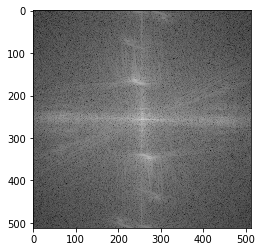

In [0]:
        ###   VISUALISER LE MODULE DE L'IMAGE room.png   ###
        view_dft('room.png')

## 5.1 Zoom arrière par sous-échantillonnage

### Question 16

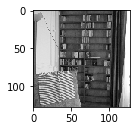

In [0]:
# Sous-échantillonnage par r:
r = 4

v4 = u[::r,::r]

plt.figure(figsize=[s/72.0 for s in v4.shape])
plt.imshow(v4, cmap=plt.cm.gray)

**Q16 :** Écrivez un code pour visualiser le module de sa TFD (à nouveau avec votre fonction `view_dft`).

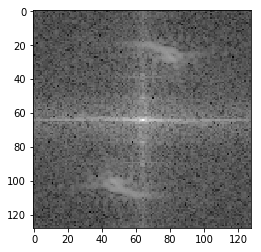

In [0]:
        ###   VISUALISER LE MODULE DE LA TFD DE v4 ICI  ###
        imageio.imsave("zoom_arriere.png", v4)
        view_dft("zoom_arriere.png")

**Q16 bis:** Qu'observe-t-on ? Comme cela se traduit-il au niveau du spectre ?

**Réponse :** Il y a beaucoup de points noirs. Au niveau du spectre, cela s'explique par la perte des spectres.

## 5.2 Repliement du spectre pour une onde pure

### Question 17

On va commencer par créer une onde pure de haute fréquence. Le code est déjà écrit dans la cellule suivante :

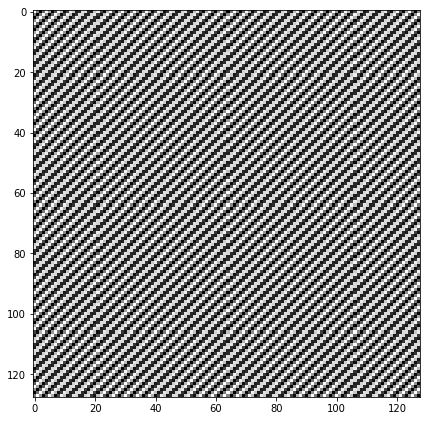

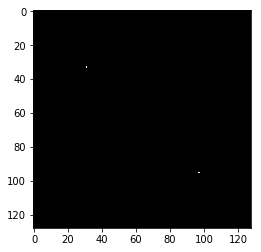

In [0]:
N = 128
f1, f2 = 33, 31

tfu = np.zeros((N,N),np.complex64)
tfu[f1+N//2,f2+N//2] = 1
tfu[-f1+N//2,-f2+N//2] = 1

u = np.real(np.fft.ifft2(np.fft.fftshift(tfu)))

plt.figure(figsize=[s/18.0 for s in u.shape])
plt.imshow(u, cmap=plt.cm.gray, interpolation='nearest')
plt.figure()
plt.imshow(np.real((fft2(u))))

La cellule suivante effectue un sous-échantillonnage de l'image `u` par un facteur deux :

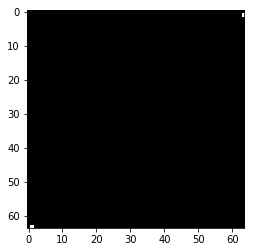

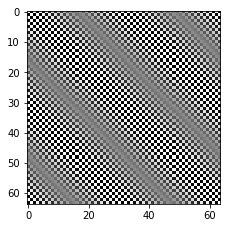

In [0]:
r = 2

v2 = u[::r,::r]
plt.imshow(np.real(fftshift(fft2(v2))))
plt.figure(figsize=[s/18.0 for s in v2.shape])
plt.imshow(v2, cmap=plt.cm.gray, interpolation='nearest')

Et la cellule qui suit un sous-échantillonne par un facteur quatre de cette image :

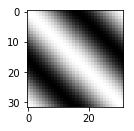

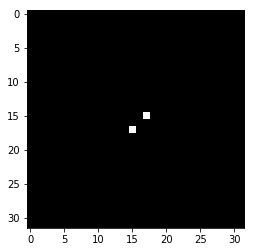

In [0]:
r = 4

v4 = u[::r,::r]
plt.figure(figsize=[s/18.0 for s in v4.shape])
plt.imshow(v4, cmap=plt.cm.gray, interpolation='nearest')
plt.figure()
plt.imshow(np.real(fftshift(fft2(v4))))

**Q17 :** Expliquez précisément le comportement des deux ondes sous-échantillonnées (`v2` et `v4`).

**Réponse :** La fréquence est décroissante par rapport au facteur.

**Q17 bis :** Quelle est la fréquence de l'onde de l'image sous-échantillonnée par quatre ?

**Réponse :** (15,17)

**Q17 ter :** Qu'observe-t-on ? Comment cela se traduit-il au niveau du spectre ?

**Réponse :** On observe alasing(repliment de l'image). Au cas de aliasing, le nombre d'échantillon est plus grand que le nombre de spectres, et les nouveaux spectres sont la somme des spectres modulo M(le nouveau nombre total de spectre). Donc les spectres sont changés.

## 5.3 Zoom arrière par coupure fréquentielle

Dans cette section, **vous n'avez rien à faire**. Cette section est juste pour vous présenter une solution. A la section 5.2, on vous a introduit le phénomène de repliement du spectre. Pour l'éviter, on peut mettre à 0 les hautes fréquences avant de sous-échantillonner. Vous pouvez exécuter la cellule suivante, juste pour information, et comparez avec ce qui précède. **Vous n'avez rien à rédiger sur cette partie**.

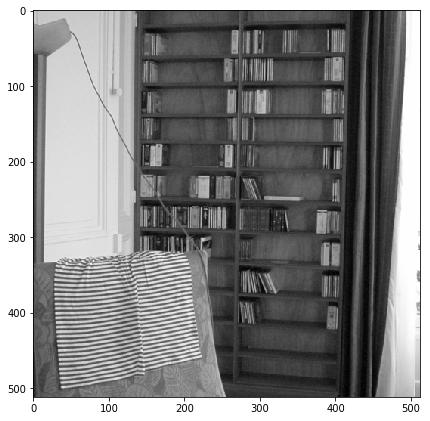

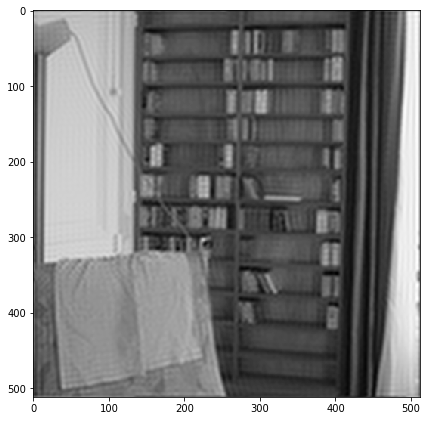

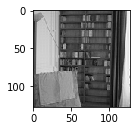

In [0]:
u = imageio.imread('room.png')
r = 4 #facteur pour la coupure fréquentielle

plt.figure(figsize=[s/72.0 for s in u.shape])
plt.imshow(u, cmap=plt.cm.gray)

(m,n) = u.shape
tfu = np.fft.fftshift(np.fft.fft2(u))

## Coupure frequentielle :

ctfu = np.zeros((m,n),np.complex64)
ctfu[ (m//2-m//(2*r)):(m//2+m//(2*r)), (m//2-m//(2*r)):(m//2+m//(2*r)) ] = tfu[ (m//2-m//(2*r)):(m//2+m//(2*r)) , \
                                                                                (m//2-m//(2*r)):(m//2+m//(2*r)) ]

cu = np.real(np.fft.ifft2(np.fft.fftshift(ctfu)))
nv4 = cu[::r,::r]

plt.figure(figsize=[s/72.0 for s in cu.shape])
plt.imshow(cu, cmap=plt.cm.gray)


plt.figure(figsize=[s/72.0 for s in nv4.shape])
plt.imshow(nv4, cmap=plt.cm.gray)